**Lineaarinen regressio kotimaan ja ulkomaan matkoista, jotka tässä käsitelty erikseen, aineisto normalisoitu**

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:

df = pd.read_excel("YO_0_linregr_01.xlsx")
df.head()

,majoitusmuoto,matkakohde,matkan tarkoitus,matkan tyyppi,vuosi,matkat yön yli lkm tuhansia,yöpymiset lkm tuhansia,matkan ka kesto yötä,matkan med kesto yötä
0,Yhteensä KOTI VA,1,1,11,1,26770,73470,2.7,2
1,Yhteensä KOTI T,1,2,12,1,4140,8270,2.0,1
2,Yhteensä ULKO VA,2,1,21,1,7100,43610,6.1,4
3,Yhteensä ULKO T,2,2,22,1,1950,9780,5.0,2
4,Yhteensä KOTI VA,1,1,11,2,26530,75620,2.9,2


In [ ]:
df.dtypes

majoitusmuoto                   object
matkakohde                       int64
matkan tarkoitus                 int64
matkan tyyppi                    int64
vuosi                            int64
matkat yön yli lkm tuhansia      int64
yöpymiset lkm tuhansia           int64
matkan ka kesto yötä           float64
matkan med kesto yötä            int64
dtype: object

In [ ]:

df.describe()

,matkakohde,matkan tarkoitus,matkan tyyppi,vuosi,matkat yön yli lkm tuhansia,yöpymiset lkm tuhansia,matkan ka kesto yötä,matkan med kesto yötä
count,40.00000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1.50000,1.50000,16.500000,5.500000,9179.750000,32354.000000,4.312500,2.375000
std,0.50637,0.50637,5.088952,2.908872,9914.195854,29819.668763,2.266726,1.004796
min,1.00000,1.00000,11.000000,1.000000,280.000000,2100.000000,1.800000,1.000000
25%,1.00000,1.00000,11.750000,3.000000,1957.500000,7212.500000,2.800000,2.000000
50%,1.50000,1.50000,16.500000,5.500000,3905.000000,12760.000000,3.900000,2.000000
75%,2.00000,2.00000,21.250000,8.000000,11022.500000,52862.500000,5.825000,3.000000
max,2.00000,2.00000,22.000000,10.000000,27720.000000,97450.000000,11.400000,5.000000


**KOTIMAAN MATKAT**

In [ ]:

df1 = (df[df.matkakohde == 1])
df1.head()


,majoitusmuoto,matkakohde,matkan tarkoitus,matkan tyyppi,vuosi,matkat yön yli lkm tuhansia,yöpymiset lkm tuhansia,matkan ka kesto yötä,matkan med kesto yötä
0,Yhteensä KOTI VA,1,1,11,1,26770,73470,2.7,2
1,Yhteensä KOTI T,1,2,12,1,4140,8270,2.0,1
4,Yhteensä KOTI VA,1,1,11,2,26530,75620,2.9,2
5,Yhteensä KOTI T,1,2,12,2,3950,7160,1.8,1
8,Yhteensä KOTI VA,1,1,11,3,25210,71830,2.8,2


In [ ]:
df1.describe()

,matkakohde,matkan tarkoitus,matkan tyyppi,vuosi,matkat yön yli lkm tuhansia,yöpymiset lkm tuhansia,matkan ka kesto yötä,matkan med kesto yötä
count,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,1.0,1.500000,11.500000,5.500000,14524.500000,41808.500000,2.585000,1.65000
std,0.0,0.512989,0.512989,2.946898,11543.537939,36254.345406,0.635175,0.48936
min,1.0,1.000000,11.000000,1.000000,1650.000000,4900.000000,1.800000,1.00000
25%,1.0,1.000000,11.000000,3.000000,3627.500000,7120.000000,1.900000,1.00000
50%,1.0,1.500000,11.500000,5.500000,12760.000000,40050.000000,2.800000,2.00000
75%,1.0,2.000000,12.000000,8.000000,25780.000000,73387.500000,2.900000,2.00000
max,1.0,2.000000,12.000000,10.000000,27720.000000,97450.000000,3.900000,2.00000


In [ ]:

#poistettu majoitusmuoto -muuttuja
df2 = df1.iloc[:,1:]
df2.head()

,matkakohde,matkan tarkoitus,matkan tyyppi,vuosi,matkat yön yli lkm tuhansia,yöpymiset lkm tuhansia,matkan ka kesto yötä,matkan med kesto yötä
0,1,1,11,1,26770,73470,2.7,2
1,1,2,12,1,4140,8270,2.0,1
4,1,1,11,2,26530,75620,2.9,2
5,1,2,12,2,3950,7160,1.8,1
8,1,1,11,3,25210,71830,2.8,2


In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2 = scaler.fit_transform(df2)

In [ ]:

df2 = pd.DataFrame(df2, columns =['matkakohde', 'matkan tarkoitus', 'matkan tyyppi', 'vuosi', 'matkat yön yli lkm tuhansia', 'yöpymiset lkm tuhansia', 'matkan ka kesto yötä', 'matkan med kesto yötä'])
df2.head()

,matkakohde,matkan tarkoitus,matkan tyyppi,vuosi,matkat yön yli lkm tuhansia,yöpymiset lkm tuhansia,matkan ka kesto yötä,matkan med kesto yötä
0,0.0,0.0,0.0,0.000000,0.963560,0.740897,0.428571,1.0
1,0.0,1.0,1.0,0.000000,0.095512,0.036413,0.095238,0.0
2,0.0,0.0,0.0,0.111111,0.954354,0.764127,0.523810,1.0
3,0.0,1.0,1.0,0.111111,0.088224,0.024419,0.000000,0.0
4,0.0,0.0,0.0,0.222222,0.903721,0.723177,0.476190,1.0


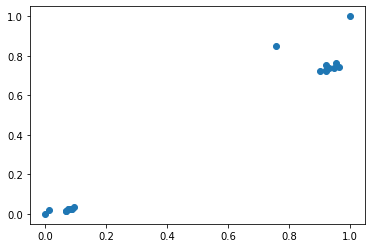

In [ ]:
# Kotimaan matkat: matkojen lukumäärä ja yöpymisten lukumäärä

plt.scatter(df2['matkat yön yli lkm tuhansia'], df2['yöpymiset lkm tuhansia'])
plt.show()


In [ ]:

# muutetaan muuttujanimet
travel = df2['matkat yön yli lkm tuhansia']
overnight = df2['yöpymiset lkm tuhansia']


In [ ]:

travel = np.array(travel).reshape(-1,1) # pitää olla numpyn 2D taulu
overnight = np.array(overnight).reshape(-1,1)
travel

array([[0.96355965],
       [0.09551208],
       [0.95435366],
       [0.08822401],
       [0.90372075],
       [0.07633295],
       [0.92328347],
       [0.06827771],
       [0.9313387 ],
       [0.08477177],
       [0.94859992],
       [0.08170311],
       [0.92174914],
       [0.0686613 ],
       [0.92366705],
       [0.07441504],
       [0.75680859],
       [0.01189106],
       [1.        ],
       [0.        ]])

**Otetaan käyttöön lineaarisen regression malli.**

In [ ]:

malli = linear_model.LinearRegression()
malli.fit(travel,overnight)

LinearRegression()

In [ ]:

# ennustetaan overnight -arvo kun travel -arvo on 0.8

overnight1 = np.full((1,1),0.8) # pitää olla numpyn 2D taulu
travel1 = malli.predict(overnight1)
travel1

array([[0.665196]])

**Piirretään regressiosuora**

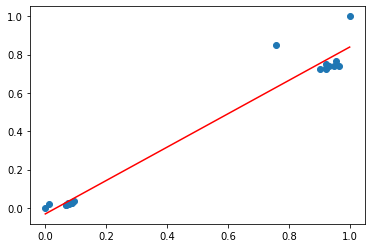

In [ ]:

# regressiosuora
# valittu suoralle alku 0 ja loppu 1 travel -muuttujan arvojen perusteella

travel2 = np.linspace(0,1,2).reshape(-1,1)
overnight2 = malli.predict(travel2)
plt.plot(travel2, overnight2, color="red")
plt.scatter(travel, overnight)
plt.show()


**Lasketaan RMSE ja R2 arvot.**

In [ ]:

from sklearn import metrics

overnight_hat = malli.predict(travel)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(overnight, overnight_hat)))
print('R2 value:', metrics.r2_score(overnight, overnight_hat))


Root Mean Squared Error: 0.068922353211133
R2 value: 0.9674141316223791


**Malli sai erinomaisen R2 arvon 0.967**

**Kun kotimaan ja ulkomaan matkat käsiteltiin yhdessä, R2 oli 0.878**

**ULKOMAAN MATKAT**

In [ ]:
#luodaan df3 ulkomaan matkoja varten

df3 = (df[df.matkakohde == 2])
df3.head()

,majoitusmuoto,matkakohde,matkan tarkoitus,matkan tyyppi,vuosi,matkat yön yli lkm tuhansia,yöpymiset lkm tuhansia,matkan ka kesto yötä,matkan med kesto yötä
2,Yhteensä ULKO VA,2,1,21,1,7100,43610,6.1,4
3,Yhteensä ULKO T,2,2,22,1,1950,9780,5.0,2
6,Yhteensä ULKO VA,2,1,21,2,6990,42470,6.1,3
7,Yhteensä ULKO T,2,2,22,2,1580,6380,4.0,2
10,Yhteensä ULKO VA,2,1,21,3,7030,41550,5.9,4


In [ ]:
df3.describe()

,matkakohde,matkan tarkoitus,matkan tyyppi,vuosi,matkat yön yli lkm tuhansia,yöpymiset lkm tuhansia,matkan ka kesto yötä,matkan med kesto yötä
count,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,2.0,1.500000,21.500000,5.500000,3835.000000,22899.500000,6.040000,3.100000
std,0.0,0.512989,0.512989,2.946898,2891.855169,17962.851571,1.964795,0.852242
min,2.0,1.000000,21.000000,1.000000,280.000000,2100.000000,3.900000,2.000000
25%,2.0,1.000000,21.000000,3.000000,1690.000000,7977.500000,4.725000,2.750000
50%,2.0,1.500000,21.500000,5.500000,2005.000000,12760.000000,5.850000,3.000000
75%,2.0,2.000000,22.000000,8.000000,7135.000000,41990.000000,6.225000,4.000000
max,2.0,2.000000,22.000000,10.000000,7570.000000,46540.000000,11.400000,5.000000


In [ ]:

#poistettu majoitusmuoto -muuttuja
df4 = df3.iloc[:,1:]
df4.head()

,matkakohde,matkan tarkoitus,matkan tyyppi,vuosi,matkat yön yli lkm tuhansia,yöpymiset lkm tuhansia,matkan ka kesto yötä,matkan med kesto yötä
2,2,1,21,1,7100,43610,6.1,4
3,2,2,22,1,1950,9780,5.0,2
6,2,1,21,2,6990,42470,6.1,3
7,2,2,22,2,1580,6380,4.0,2
10,2,1,21,3,7030,41550,5.9,4


In [ ]:
df4.describe()

,matkakohde,matkan tarkoitus,matkan tyyppi,vuosi,matkat yön yli lkm tuhansia,yöpymiset lkm tuhansia,matkan ka kesto yötä,matkan med kesto yötä
count,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.0,0.500000,0.500000,0.500000,0.487654,0.468036,0.285333,0.366667
std,0.0,0.512989,0.512989,0.327433,0.396688,0.404205,0.261973,0.284081
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.222222,0.193416,0.132257,0.110000,0.250000
50%,0.0,0.500000,0.500000,0.500000,0.236626,0.239874,0.260000,0.333333
75%,0.0,1.000000,1.000000,0.777778,0.940329,0.897615,0.310000,0.666667
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df4 = scaler.fit_transform(df4)

In [ ]:

df4 = pd.DataFrame(df4, columns =['matkakohde', 'matkan tarkoitus', 'matkan tyyppi', 'vuosi', 'matkat yön yli lkm tuhansia', 'yöpymiset lkm tuhansia', 'matkan ka kesto yötä', 'matkan med kesto yötä'])
df4.head()


,matkakohde,matkan tarkoitus,matkan tyyppi,vuosi,matkat yön yli lkm tuhansia,yöpymiset lkm tuhansia,matkan ka kesto yötä,matkan med kesto yötä
0,0.0,0.0,0.0,0.000000,0.935528,0.934068,0.293333,0.666667
1,0.0,1.0,1.0,0.000000,0.229081,0.172817,0.146667,0.000000
2,0.0,0.0,0.0,0.111111,0.920439,0.908416,0.293333,0.333333
3,0.0,1.0,1.0,0.111111,0.178326,0.096310,0.013333,0.000000
4,0.0,0.0,0.0,0.222222,0.925926,0.887714,0.266667,0.666667


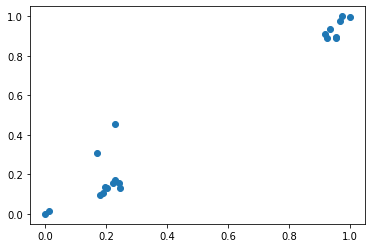

In [ ]:
# Ulkomaan matkat: matkojen ja yöpymisten lukumäärä

plt.scatter(df4['matkat yön yli lkm tuhansia'], df4['yöpymiset lkm tuhansia'])
plt.show()


In [ ]:

# muutetaan muuttujanimet
travel = df4['matkat yön yli lkm tuhansia']
overnight = df4['yöpymiset lkm tuhansia']

In [ ]:

travel = np.array(travel).reshape(-1,1) # pitää olla numpyn 2D taulu
overnight = np.array(overnight).reshape(-1,1)
travel

array([[0.93552812],
       [0.22908093],
       [0.92043896],
       [0.17832647],
       [0.92592593],
       [0.19478738],
       [0.95610425],
       [0.18930041],
       [0.95473251],
       [0.22085048],
       [1.        ],
       [0.20301783],
       [0.97530864],
       [0.2441701 ],
       [0.96982167],
       [0.24279835],
       [0.23045267],
       [0.01234568],
       [0.17009602],
       [0.        ]])

In [ ]:

malli = linear_model.LinearRegression()
malli.fit(travel,overnight)

LinearRegression()

In [ ]:

# ennustetaan overnight kun travel on 0.8

overnight1 = np.full((1,1),0.8) # pitää olla numpyn 2D taulu
travel1 = malli.predict(overnight1)
travel1

array([[0.665196]])

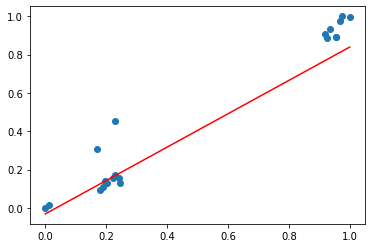

In [ ]:


#piirretään regressiosuora
# valittu suoralle alku 0 ja loppu 1 travel -muuttujan arvojen perusteella

trip2 = np.linspace(0,1,2).reshape(-1,1)
overnight2 = malli.predict(travel2)
plt.plot(trip2, overnight2, color="red") # tekee regressiosuoran
plt.scatter(travel, overnight)
plt.show()

In [ ]:

from sklearn import metrics


overnight_hat = malli.predict(travel)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(overnight, overnight_hat)))
print('R2 value:', metrics.r2_score(overnight, overnight_hat))

Root Mean Squared Error: 0.11874765989778431
R2 value: 0.9091501838963425


**Malli sai hyvän R2 arvon 0.909**

**Kun kotimaan ja ulkomaan matkat käsiteltiin yhdessä, R2 oli 0.878**

**Voidaan päätellä, että kun kaikki matkat käsiteltiin yhdessä, lineaarisen regression malli ei toiminut niin hyvin kuin jos käsiteltiin kotimaan ja ulkomaan matkat erikseen.**